In [1]:
import cv2 as cv
import numpy as np
import math as m
from matplotlib import pyplot as plt
import os
import sys

In [2]:
path_classes = '../Imágenes/'
images_names = os.listdir(path_classes)

OSError: [Errno 2] No such file or directory: '../Im\xc3\xa1genes/'

In [13]:
z=0;
for i in range(len(images_names)):
    img=cv.imread('../Imágenes/'+images_names[i]);
    img.shape
    rgB=img[:,:,0];
    rGb=img[:,:,1];
    Rgb=img[:,:,2];
    s=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    I=s;
    II=I;

    [fil,col]=I.shape
    for i in range(0,fil):
        for j in range(0,col):
            if I[i,j]<25:
                I[i,j]=0;

    for i in range(0,fil):
        for j in range(0,col):
            if I[i,j]>0:
                I[i,j]=1;
                
    #se=np.ones((50,50),np.uint8);
    #se2=np.ones((10,10),np.uint8);
    se = cv.getStructuringElement(cv.MORPH_ELLIPSE,(50, 50));
    se2 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(11, 11));
    closing=cv.morphologyEx(I,cv.MORPH_CLOSE,se)
    dilataion=cv.dilate(closing,se2)

    #Encontrar contornos 
    S,contours,hierarchy=cv.findContours(dilataion,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE);
    cnt=contours[:];
    num=len(cnt);
    box=np.zeros((num,4));

    for j in range(num):
        box[j,:]=cv.boundingRect(cnt[j]);

    L=np.zeros((num,4));
    Max=[0,0];

    for j in range(0,num):
        L[j,:]=box[j];
        if L[j,2]>Max[0]:
            Max=[j,L[j,2]];
            
    if len(box)!=0:
        
        BOX=box[Max[0],:];
        #Mascara
        b=img[int(BOX[1]):int(BOX[1]+BOX[2]),int(BOX[0]):int(BOX[0]+BOX[2]),:];
        directorio2="../blanks/blank (%d).jpg" %(z);
        cv.imwrite(directorio2,b);
        directorio3="../blanks/blank (%d).jpg" %(z);
        A=cv.imread(directorio3);
        z=z+1;
        [fil,col,cap]=A.shape
        rgB=A[:,:,0];
        rGb=A[:,:,1];
        Rgb=A[:,:,2];
        #Nomrmalización
        R=Rgb/255.0;
        G=rGb/255.0;
        B=rgB/255.0;
        #construcción de espacio k de color
        K=np.zeros((fil,col));
        for i in range(0,fil):
            for j in range(0,col):        
                MAX=max(R[i,j],G[i,j],B[i,j]);
                K[i,j]=1-MAX;

        cv.imwrite("./prueba.bmp",K);
        k=cv.imread("./prueba.bmp");
        BW1=cv.Laplacian(k,cv.CV_8UC1);
        Image=BW1[:,:,0]+BW1[:,:,1]+BW1[:,:,2]

        #Se calcula boundingRect para encontrar los caracteres de interes
        ret,thresh=cv.threshold(Image,0,255,0);
        S,contours,hierarchy=cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE);
        cnt=contours[:];
        num=len(cnt);
        box=np.zeros((num,4));
        for j in range(0,num):
            box[j,:]=cv.boundingRect(cnt[j]);

        Box=np.zeros((20,4));
        [L,A]=thresh.shape;
        q=0;
        for j in range(0,num):
            p=box[j,:]
            if p[3]>=0.4*L and p[3]<=0.7*L and p[2]>=0.08*A and p[2]<=0.17*A:
                Box[q]=p;
                q=q+1;

        BOX=np.zeros((6,4));
        num=len(Box)
        #Se procee a encntrar dobles
        q=0;
        for j in range(0,num):
            if j%2==0 and j<11:
                BOX[q]=Box[j];
                q=q+1;

        BOX=BOX.astype(int)
        LETRA3=img[BOX[0,1]:BOX[0,1]+BOX[0,3],BOX[0,0]:BOX[0,0]+BOX[0,2]];
        LETRA1=img[BOX[1,1]:BOX[1,1]+BOX[1,3],BOX[1,0]:BOX[1,0]+BOX[1,2]];
        NUM1=img[BOX[2,1]:BOX[2,1]+BOX[2,3],BOX[2,0]:BOX[2,0]+BOX[2,2]];
        NUM2=img[BOX[3,1]:BOX[3,1]+BOX[3,3],BOX[3,0]:BOX[3,0]+BOX[3,2]];
        LETRA2=img[BOX[4,1]:BOX[4,1]+BOX[4,3],BOX[4,0]:BOX[4,0]+BOX[4,2]];
        NUM3=img[BOX[5,1]:BOX[5,1]+BOX[5,3],BOX[5,0]:BOX[5,0]+BOX[5,2]];

        for i in range(6):

            name_img="../Letras/caracter_{0}_{1}.jpg".format(z,i);
            if i==0:
                if LETRA1.shape[0]!=0:
                    cv.imwrite(name_img,LETRA1);                
            if i==1:
                if LETRA2.shape[0]!=0:
                    cv.imwrite(name_img,LETRA2);                
            if i==2:
                if LETRA3.shape[0]!=0:
                    cv.imwrite(name_img,LETRA3);
            if i==3:
                if NUM1.shape[0]!=0:
                    cv.imwrite(name_img,NUM1);
            if i==4:
                if NUM2.shape[0]!=0:
                    cv.imwrite(name_img,NUM2);
            if i==5:
                if NUM3.shape[0]!=0:
                    cv.imwrite(name_img,NUM3);


5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


TypeError: Image data cannot be converted to float

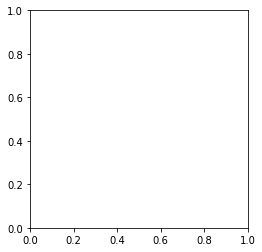

In [2]:
img=cv.imread("../Imágenes/Placa-Madrid.png")
plt.imshow(img)

In [67]:
#Definición de combinación RGB para trabajar
#I=cv.absdiff(rGb,rgB);
#s=np.absolute(rGb-Rgb)
s=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
I=s;
II=I;
#cv.imshow('',II)
#cv.waitKey(0);

#Binarización inicial de la imagen
[fil,col]=I.shape
for i in range(0,fil):
    for j in range(0,col):
        if I[i,j]<150:
            I[i,j]=0;
            
for i in range(0,fil):
    for j in range(0,col):
        if I[i,j]>0:
            I[i,j]=1;

(1004, 1890)


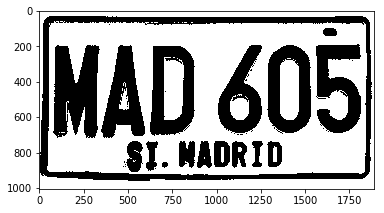

In [68]:
print I.shape
plt.imshow(I,cmap='gray')

In [69]:
#Transformaciones morfologicas
se=np.ones((50,50),np.uint8);
se2=np.ones((10,10),np.uint8);
closing=cv.morphologyEx(I,cv.MORPH_CLOSE,se)
dilataion=cv.dilate(closing,se2,1)

#Encontrar contornos 
S,contours,hierarchy=cv.findContours(dilataion,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE);
cnt=contours[:];
num=len(cnt);
box=np.zeros((num,4));

for j in range(num):
    box[j,:]=cv.boundingRect(cnt[j]);

L=np.zeros((num,4));
Max=[0,0];

for j in range(0,num):
    L[j,:]=box[j];
    if L[j,2]>Max[0]:
        Max=[j,L[j,2]];

BOX=box[Max[0],:];
#Mascara
b=img[int(BOX[1]):int(BOX[1]+BOX[2]),int(BOX[0]):int(BOX[0]+BOX[2]),:];
directorio2="../blanks/blank (%d).jpg" %(1);
cv.imwrite(directorio2,b);

(1004, 1890)


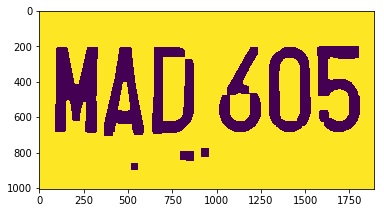

In [70]:
print dilataion.shape
plt.imshow(dilataion)

(1004, 1890)


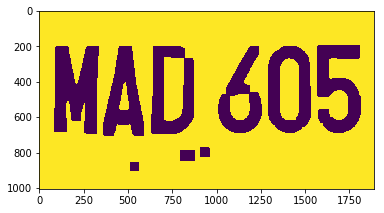

In [71]:
print closing.shape
plt.imshow(closing)

In [72]:
#Segmentación
directorio3="../blanks/blank (%d).jpg" %(1);
A=cv.imread(directorio3);
[fil,col,cap]=A.shape
rgB=A[:,:,0];
rGb=A[:,:,1];
Rgb=A[:,:,2];
#Nomrmalización
R=Rgb/255.0;
G=rGb/255.0;
B=rgB/255.0;
#construcción de espacio k de color
K=np.zeros((fil,col));
for i in range(0,fil):
    for j in range(0,col):        
        MAX=max(R[i,j],G[i,j],B[i,j]);
        K[i,j]=1-MAX;

cv.imwrite("./prueba.bmp",K);
k=cv.imread("./prueba.bmp");
BW1=cv.Laplacian(k,cv.CV_8UC1);
Image=BW1[:,:,0]+BW1[:,:,1]+BW1[:,:,2]

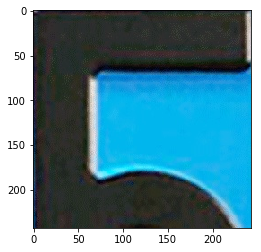

In [73]:
plt.imshow(A)

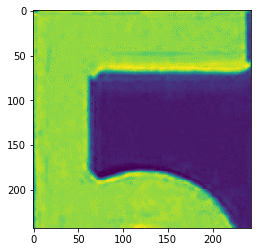

In [74]:
plt.imshow(K)

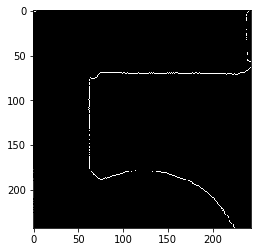

In [75]:
plt.imshow(BW1*255)

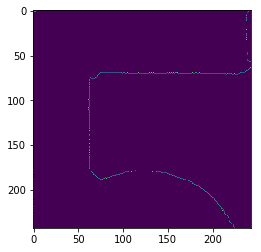

In [76]:
plt.imshow(Image)

In [61]:
#Se calcula boundingRect para encontrar los caracteres de interes
ret,thresh=cv.threshold(Image,0,255,0);
S,contours,hierarchy=cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE);
cnt=contours[:];
num=len(cnt);
box=np.zeros((num,4));
for j in range(0,num):
    box[j,:]=cv.boundingRect(cnt[j]);
    
Box=np.zeros((20,4));
[L,A]=thresh.shape;
q=0;
for j in range(0,num):
    p=box[j,:]
    if p[3]>=0.4*L and p[3]<=0.7*L and p[2]>=0.08*A and p[2]<=0.17*A:
        Box[q]=p;
        q=q+1;

BOX=np.zeros((6,4));
num=len(Box)
#Se procee a encntrar dobles
q=0;
for j in range(0,num):
    if j%2==0 and j<11:
        BOX[q]=Box[j];
        q=q+1;

(232, 500)


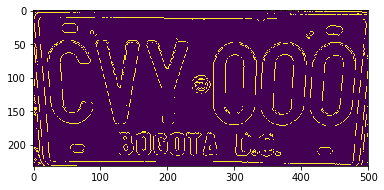

In [62]:
print S.shape
plt.imshow(S)

In [63]:
BOX

array([[413.,  48.,  69., 125.],
       [340.,  47.,  69., 125.],
       [269.,  47.,  65., 124.],
       [168.,  45.,  64., 125.],
       [ 93.,  44.,  66., 126.],
       [ 21.,  44.,  69., 125.]])

In [64]:
#calculo de las letras y números
BOX=BOX.astype(int)
LETRA3=BW1[BOX[0,1]:BOX[0,1]+BOX[0,3],BOX[0,0]:BOX[0,0]+BOX[0,2]];
LETRA1=BW1[BOX[1,1]:BOX[1,1]+BOX[1,3],BOX[1,0]:BOX[1,0]+BOX[1,2]];
NUM1=BW1[BOX[2,1]:BOX[2,1]+BOX[2,3],BOX[2,0]:BOX[2,0]+BOX[2,2]];
NUM2=BW1[BOX[3,1]:BOX[3,1]+BOX[3,3],BOX[3,0]:BOX[3,0]+BOX[3,2]];
LETRA2=BW1[BOX[4,1]:BOX[4,1]+BOX[4,3],BOX[4,0]:BOX[4,0]+BOX[4,2]];
NUM3=BW1[BOX[5,1]:BOX[5,1]+BOX[5,3],BOX[5,0]:BOX[5,0]+BOX[5,2]];

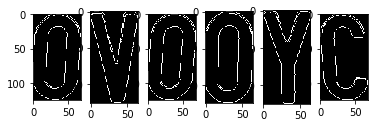

In [65]:
plt.subplot(161),plt.imshow(LETRA1*255,cmap='hot');
plt.subplot(162),plt.imshow(LETRA2*255);
plt.subplot(163),plt.imshow(LETRA3*255);
plt.subplot(164),plt.imshow(NUM1*255);
plt.subplot(165),plt.imshow(NUM2*255);
plt.subplot(166),plt.imshow(NUM3*255);

In [14]:
piso=m.floor(fil-0.3*fil);
piso=int(piso)
test=BW1[0:piso,:];
[fil,col,cap]=test.shape;
techo=m.floor(0.2*fil);
lado=m.floor(0.45*col);
techo=int(techo);
lado=int(lado)
test2=test[techo:fil,lado:col-lado];
mitad=int(m.floor(0.5*col));
numeros=test2[:,mitad:];
[fil,col,cap]=numeros.shape;
uno=int(0.33*col);
dos=int(0.67*col);
num1=numeros[:,0:uno];
